👉 Please upload your image file (e.g., aeval1.bmp)


Saving aeval1.bmp to aeval1.bmp
✅ Uploaded file: aeval1.bmp


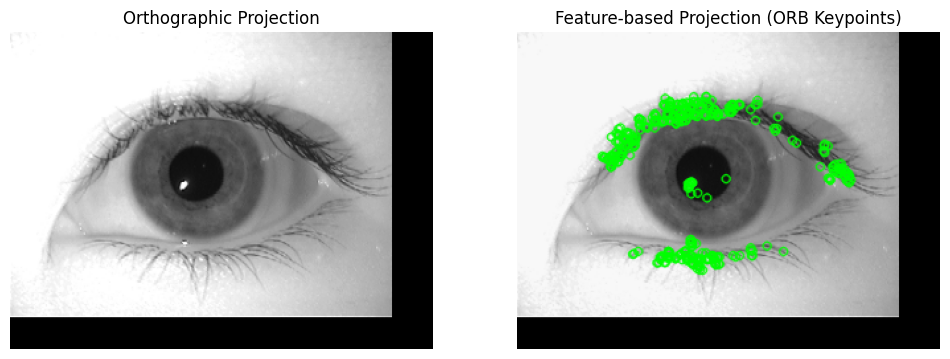

⬇️ Download processed images:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ===============================================
# 2D Projection in Computer Vision (Orthographic + Feature-based)
# ===============================================

# Step 1: Install and import dependencies
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Step 2: Upload your image file (e.g., aeval1.bmp)
print("👉 Please upload your image file (e.g., aeval1.bmp)")
uploaded = files.upload()

# Get uploaded file name automatically
for fn in uploaded.keys():
    image_path = fn
    print(f"✅ Uploaded file: {fn}")

# Step 3: Read and convert image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 4: Apply Orthographic Projection (Affine Transform)
rows, cols = gray.shape
src_points = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
dst_points = np.float32([[0, 0], [cols * 0.9, 0], [0, rows * 0.9]])  # scaling for orthographic view

affine_matrix = cv2.getAffineTransform(src_points, dst_points)
orthographic_projection = cv2.warpAffine(gray, affine_matrix, (cols, rows))

# Step 5: Apply Feature-Based Projection using ORB
orb = cv2.ORB_create(nfeatures=500)
keypoints, descriptors = orb.detectAndCompute(orthographic_projection, None)
feature_projection = cv2.drawKeypoints(
    orthographic_projection, keypoints, None, color=(0, 255, 0), flags=0
)

# Step 6: Save and display results
cv2.imwrite("orthographic_projection.png", orthographic_projection)
cv2.imwrite("feature_projection.png", feature_projection)

# Display side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orthographic_projection, cmap='gray')
plt.title("Orthographic Projection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(feature_projection, cv2.COLOR_BGR2RGB))
plt.title("Feature-based Projection (ORB Keypoints)")
plt.axis('off')

plt.show()

# Step 7: Download results
print("⬇️ Download processed images:")
files.download("orthographic_projection.png")
files.download("feature_projection.png")
